In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nek-310-lecture-12/defcc (1).csv


In [3]:

default=pd.read_csv('/kaggle/input/nek-310-lecture-12/defcc (1).csv')

In [4]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

<h2>No missing values, so we do not have to worry about that. Let's check for default rate between categories, and maybe do some binning.</h2>

In [13]:
#pd.crosstab(default['EDUCATION'],default['dpnm'])
pd.crosstab(default['EDUCATION'],default['dpnm'], normalize='index')


dpnm,0,1
EDUCATION,,
0,1.000000,0.000000
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.943089,0.056911
5,0.935714,0.064286
6,0.843137,0.156863


<h2>Notes</h2>
<h3>
Sex=1 has def rate 24% and Sex=2 has def rate 20%
<br><br>
Few obs in Education cats 0, 4, 5 and 6. Looking at def rate we maybe should group 0, 4 & 5, 1 & 6 and 2&3
<br><br>
Few obs in marriage=0 and 3. Looking at the def rates we could combine 0 with 2 and 1 with 3.
<br><br>
For PAY_1 it seems like a good idea to group -2, -1 & 0, give 1 it's own group and put 2 or larger in their own group
<br><br>
For PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 it seems like a good idea to group -2, -1, 0 and 1 in one group and put 2 or larger in their own group
<br><br>The rest of the features are "continuous" and the RF and XGB should find the best splits without our help.
</h3>

In [15]:
#Recode edu 4 or 5 to 0
fil = (default.EDUCATION == 4) | (default.EDUCATION == 5) 
default.loc[fil,'EDUCATION']= 0

In [16]:
#Recode edu 6 to 1
fil = default.EDUCATION == 6 
default.loc[fil,'EDUCATION']= 1

In [17]:
#Recode edu 3 to 2
fil = default.EDUCATION == 3 
default.loc[fil,'EDUCATION']= 2

In [18]:
default.EDUCATION.value_counts()

EDUCATION
2    18947
1    10636
0      417
Name: count, dtype: int64

In [19]:
pd.crosstab(default['EDUCATION'],default['dpnm'], normalize='index')

dpnm,0,1
EDUCATION,,
0,0.940048,0.059952
1,0.807822,0.192178
2,0.758959,0.241041


In [20]:
#Recode marriage 2 to 0
fil = default.MARRIAGE == 2 
default.loc[fil,'MARRIAGE']= 0

In [21]:
#Recode marriage 3 to 1
fil = default.MARRIAGE == 3 
default.loc[fil,'MARRIAGE']= 1

In [ ]:
pd.crosstab(default['MARRIAGE'],default['dpnm'], normalize='index')

In [23]:
#Recode PAY_1 -2 or -1 to 0
fil = (default.PAY_1 == -2) | (default.PAY_1 == -1) 
default.loc[fil,'PAY_1']= 0

In [24]:
#Recode PAY_1 > 2 to 2
fil = (default.PAY_1 > 2) 
default.loc[fil,'PAY_1']= 2

In [25]:
#Recode PAY_2 -2 or -1 or 0 to 1
fil = (default.PAY_2 < 1)  
default.loc[fil,'PAY_2']= 1

In [26]:
#Recode PAY_2 > 2 to 2
fil = (default.PAY_2 > 2)  
default.loc[fil,'PAY_2']= 2

In [27]:
#Recode PAY_3 -2 or -1 or 0 to 1
fil = (default.PAY_3 < 1)  
default.loc[fil,'PAY_3']= 1

In [30]:
#Recode PAY_3 > 2 to 2
fil = (default.PAY_3 > 2)  
default.loc[fil,'PAY_3']= 2

In [31]:
#Recode PAY_4 -2 or -1 or 0 to 1
fil = (default.PAY_4 < 1)  
default.loc[fil,'PAY_4']= 1

In [32]:
#Recode PAY_4 > 2 to 2
fil = (default.PAY_4 > 2)  
default.loc[fil,'PAY_4']= 2

In [33]:
#Recode PAY_5 -2 or -1 or 0 to 1
fil = (default.PAY_5 < 1)  
default.loc[fil,'PAY_5']= 1

In [34]:
#Recode PAY_5 > 2 to 2
fil = (default.PAY_5 > 2)  
default.loc[fil,'PAY_5']= 2

In [35]:
#Recode PAY_6 -2 or -1 or 0 to 1
fil = (default.PAY_6 < 1)  
default.loc[fil,'PAY_6']= 1

In [36]:
#Recode PAY_6 > 2 to 2
fil = (default.PAY_6 > 2)  
default.loc[fil,'PAY_6']= 2

In [37]:
#droppa CUSTOMER ID
default=default.drop(['ID'],axis=1)

<h2>Now we try and fit the RF and the XGB with the recoded variables</h2>

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import xgboost as xgb

In [39]:
X_def = default.drop(['dpnm'],axis=1) 
Y_def=default['dpnm']

#X_std = StandardScaler().fit_transform(X_def) We will check later if standardisation makes any difference

x_train,x_test,y_train,y_test = train_test_split(X_def,Y_def,test_size=0.3,random_state=42)
#len(x_test),len(x_train),len(y_train),len(y_test)
y_train = np.ravel(y_train)

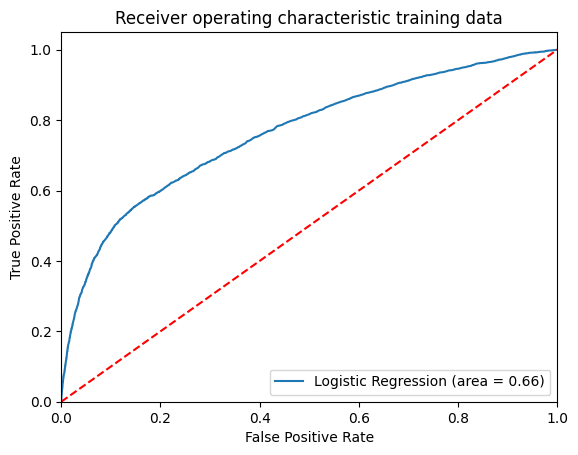

In [40]:
modelRF = RandomForestClassifier(n_estimators=300, criterion='entropy',
                                 oob_score=True,
                                 bootstrap=True,
                               random_state=2, 
                               max_features ='sqrt' ,
                               n_jobs=-1, verbose = 0).fit(x_train, y_train)


# Fit on training data
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc_train = roc_auc_score(y_train, np.argmax(modelRF.oob_decision_function_,axis=1))
fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(y_train, modelRF.oob_decision_function_[:,1])
plt.figure()
plt.plot(fpr_train_RF, tpr_train_RF, label='Logistic Regression (area = %0.2f)' % RF_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic training data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

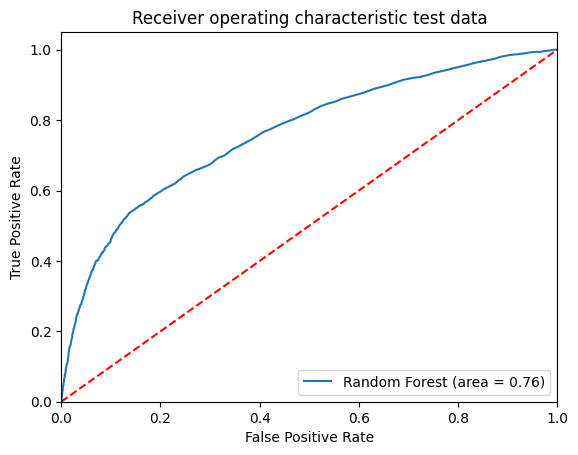

In [41]:
logit_roc_auc = roc_auc_score(y_test, modelRF.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, modelRF.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [42]:
df_x_test=pd.DataFrame(x_test)
from sklearn.inspection import permutation_importance
result = permutation_importance(modelRF, df_x_test, y_test,
                            n_repeats=30,
                            random_state=0)

In [43]:
df=pd.concat([pd.DataFrame({'Variable': pd.DataFrame(X_def).columns.tolist()}),pd.DataFrame({'Importance':result.importances_mean})],axis=1)
df1=df.sort_values(by='Importance',ascending=False)
df1.head(10)

,Variable,Importance
5,PAY_1,0.055874
6,PAY_2,0.001900
10,PAY_6,0.000952
2,EDUCATION,-0.000004
4,AGE,-0.000163
0,LIMIT_BAL,-0.000344
9,PAY_5,-0.000393
1,SEX,-0.000619
8,PAY_4,-0.000726
3,MARRIAGE,-0.000807


<h2>So no improvement, yet...Let's se what happens if we try to tweak some hyperparamters...</h2>

In [ ]:
rfc = RandomForestClassifier(random_state = 42)

params = {'n_estimators' : [150, 200, 250],
              'max_features' : [5,7,9],
              'max_depth': [12,14,16,18],
              'min_samples_leaf':[30,40,50,60]}

rsearch_rfc = RandomizedSearchCV(rfc, param_distributions= params, cv = 5, scoring = 'roc_auc',n_iter = 50,random_state = 42,n_jobs = -1,return_train_score = True)

rsearch_rfc.fit(x_train, y_train)
    
print("Tuned RF Parameters: {}".format(rsearch_rfc.best_params_))
print("_" * 100)

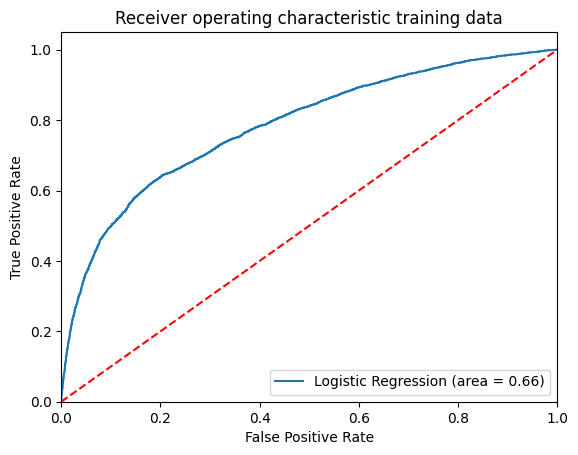

In [44]:
modelRF = RandomForestClassifier(n_estimators=200, criterion='entropy',
                                 oob_score=True,
                                 bootstrap=True,
                               random_state=2, 
                               max_features =5,
                               min_samples_leaf=40,
                               max_depth=16,
                               n_jobs=-1, verbose = 0).fit(x_train, y_train)


# Fit on training data
RF_roc_auc_train = roc_auc_score(y_train, np.argmax(modelRF.oob_decision_function_,axis=1))
fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(y_train, modelRF.oob_decision_function_[:,1])
plt.figure()
plt.plot(fpr_train_RF, tpr_train_RF, label='Logistic Regression (area = %0.2f)' % RF_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic training data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

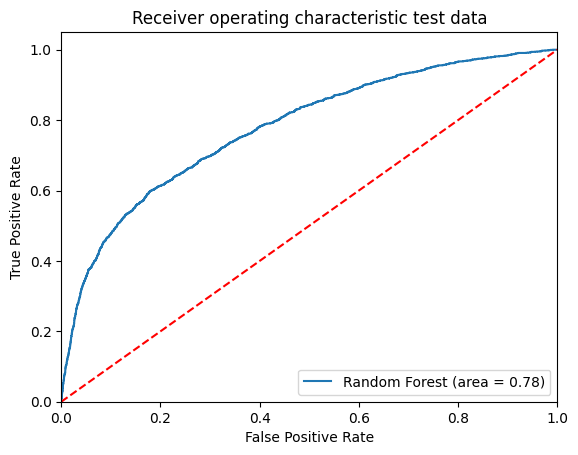

In [45]:
logit_roc_auc = roc_auc_score(y_test, modelRF.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, modelRF.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<h2>Two pe improvement. Not too shabby, but tweaking takes time...Let's check what we can get with XGB!</h2>

In [46]:
#model = xgb.XGBClassifier()
model = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic', booster='dart', gamma=0
                       , learning_rate=0.01, n_estimators=300, reg_alpha=1, reg_lambda=0)
model.fit(x_train, y_train)
predictions_train = model.predict_proba(x_train)
predictions_test = model.predict_proba(x_test)

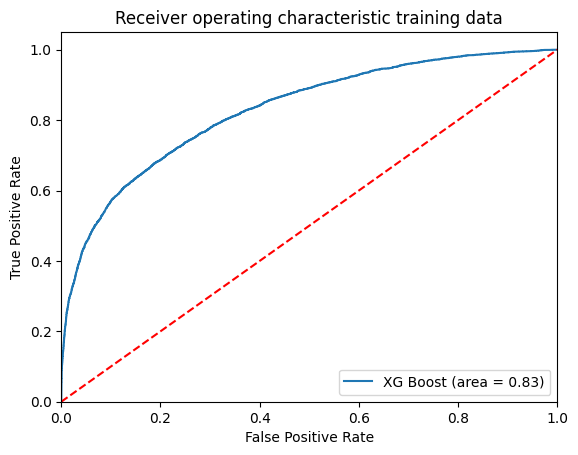

In [47]:
XG_roc_auc_train = roc_auc_score(y_train, predictions_train[:,1])
fpr_train_XG, tpr_train_XG, thresholds_train_XG = roc_curve(y_train, predictions_train[:,1])
plt.figure()
plt.plot(fpr_train_XG, tpr_train_XG, label='XG Boost (area = %0.2f)' % XG_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic training data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

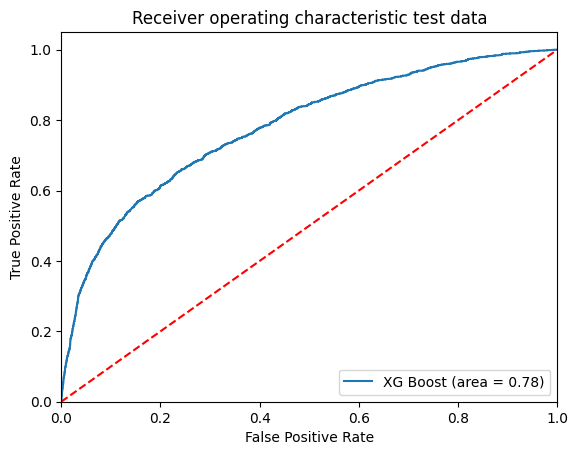

In [48]:
XG_roc_auc_test = roc_auc_score(y_test, predictions_test[:,1])
fpr_test_XG, tpr_test_XG, thresholds_test_XG = roc_curve(y_test, predictions_test[:,1])
plt.figure()
plt.plot(fpr_test_XG, tpr_test_XG, label='XG Boost (area = %0.2f)' % XG_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
mod1= xgb.XGBClassifier()

param_grid = {"learning_rate"    : [0.03, 0.04, 0.05] ,
                  "max_depth"        : [7, 8, 9, 10],
                 "min_child_weight" : [14, 16, 18],
                 "gamma"            : [0.5, 0.6, 0.7],
                 "colsample_bytree" : [0.6, 0.7, 0.8, 0.9] }
  
#Building a 5 fold CV GridSearchCV object
mod_RS = RandomizedSearchCV(mod1, param_grid ,cv = 5, scoring = 'roc_auc',n_iter = 200,n_jobs = -1)

mod_RS.fit(x_train, y_train)
    
print("Tuned XG Boost Parameters: {}".format(mod_RS.best_params_))
print("_" * 100)

In [49]:
#model = xgb.XGBClassifier()
model = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic', booster='dart',
                          min_child_weight=16, max_depth=8, learning_rate=0.04, gamma=0.6, n_estimators=300, 
                          colsample_bytree=0.7, reg_alpha=1, reg_lambda=0)
model.fit(x_train, y_train)
predictions_train = model.predict_proba(x_train)
predictions_test = model.predict_proba(x_test)

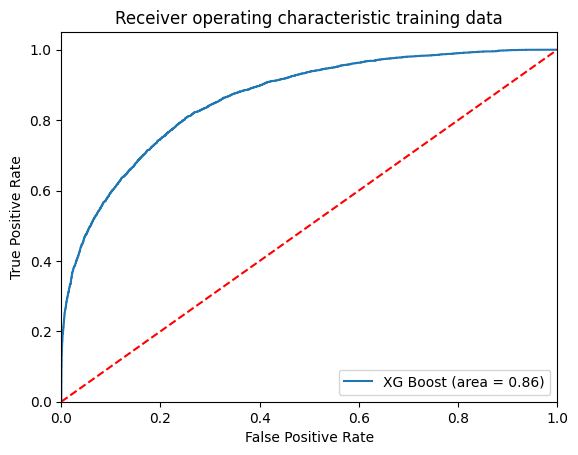

In [50]:
XG_roc_auc_train = roc_auc_score(y_train, predictions_train[:,1])
fpr_train_XG, tpr_train_XG, thresholds_train_XG = roc_curve(y_train, predictions_train[:,1])
plt.figure()
plt.plot(fpr_train_XG, tpr_train_XG, label='XG Boost (area = %0.2f)' % XG_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic training data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


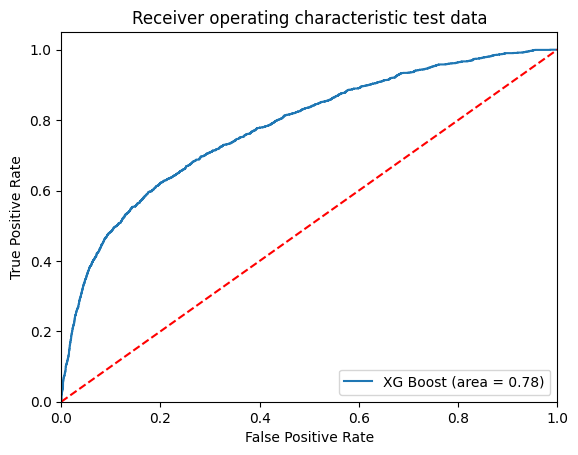

In [51]:
XG_roc_auc_test = roc_auc_score(y_test, predictions_test[:,1])
fpr_test_XG, tpr_test_XG, thresholds_test_XG = roc_curve(y_test, predictions_test[:,1])
plt.figure()
plt.plot(fpr_test_XG, tpr_test_XG, label='XG Boost (area = %0.2f)' % XG_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [52]:
df_x_test=pd.DataFrame(x_test)
from sklearn.inspection import permutation_importance
result = permutation_importance(model, df_x_test, y_test,
                            n_repeats=30,
                            random_state=0)

In [53]:
df=pd.concat([pd.DataFrame({'Variable': pd.DataFrame(X_def).columns.tolist()}),pd.DataFrame({'Importance':result.importances_mean})],axis=1)
df1=df.sort_values(by='Importance',ascending=False)
df1.head(10)

,Variable,Importance
5,PAY_1,0.060837
11,BILL_AMT1,0.001526
17,PAY_AMT1,0.001504
6,PAY_2,0.001196
19,PAY_AMT3,0.001119
0,LIMIT_BAL,0.001100
10,PAY_6,0.000922
18,PAY_AMT2,0.000889
15,BILL_AMT5,0.000756
16,BILL_AMT6,0.000663


<h2>Of course there could exist "derived variables" that work better, see e.g. lecture 10</h2>

SEX=1 has 4 pu larger de